In [4]:
import pandas as pd
import os

file_path = r"C:\Users\HP\Downloads\news_dataset.csv"
print("File exists?", os.path.exists(file_path))

df = pd.read_csv(file_path)
df.head()


File exists? True


,category,headline,short_description,date
0,POLITICS,Senate Passes Budget Resolution,The Senate today passed a new budget resolutio...,15-02-2017
1,WORLD NEWS,UN Warns About Climate Impact,The United Nations released a report on rising...,10-06-2018
2,BUSINESS,Stock Markets Rally After Policy Update,Investors cheered new economic policies leadin...,22-03-2019
3,ENTERTAINMENT,New Movie Breaks Box Office Records,The film earned record-breaking revenue in its...,05-11-2020
4,TECH,Tech Giants Reveal AI Innovations,Major tech companies introduced new AI-based p...,19-04-2021


## Data Overview:

In [5]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           20 non-null     object
 1   headline           20 non-null     object
 2   short_description  20 non-null     object
 3   date               20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


category             0
headline             0
short_description    0
date                 0
dtype: int64

## Fix date format:

In [6]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')
df.head()

,category,headline,short_description,date
0,POLITICS,Senate Passes Budget Resolution,The Senate today passed a new budget resolutio...,2017-02-15
1,WORLD NEWS,UN Warns About Climate Impact,The United Nations released a report on rising...,2018-06-10
2,BUSINESS,Stock Markets Rally After Policy Update,Investors cheered new economic policies leadin...,2019-03-22
3,ENTERTAINMENT,New Movie Breaks Box Office Records,The film earned record-breaking revenue in its...,2020-11-05
4,TECH,Tech Giants Reveal AI Innovations,Major tech companies introduced new AI-based p...,2021-04-19


## Add year column:

In [9]:
df['year'] = df['date'].dt.year
df.head()

,category,headline,short_description,date,year
0,POLITICS,Senate Passes Budget Resolution,The Senate today passed a new budget resolutio...,2017-02-15,2017
1,WORLD NEWS,UN Warns About Climate Impact,The United Nations released a report on rising...,2018-06-10,2018
2,BUSINESS,Stock Markets Rally After Policy Update,Investors cheered new economic policies leadin...,2019-03-22,2019
3,ENTERTAINMENT,New Movie Breaks Box Office Records,The film earned record-breaking revenue in its...,2020-11-05,2020
4,TECH,Tech Giants Reveal AI Innovations,Major tech companies introduced new AI-based p...,2021-04-19,2021


## Category Distribution:

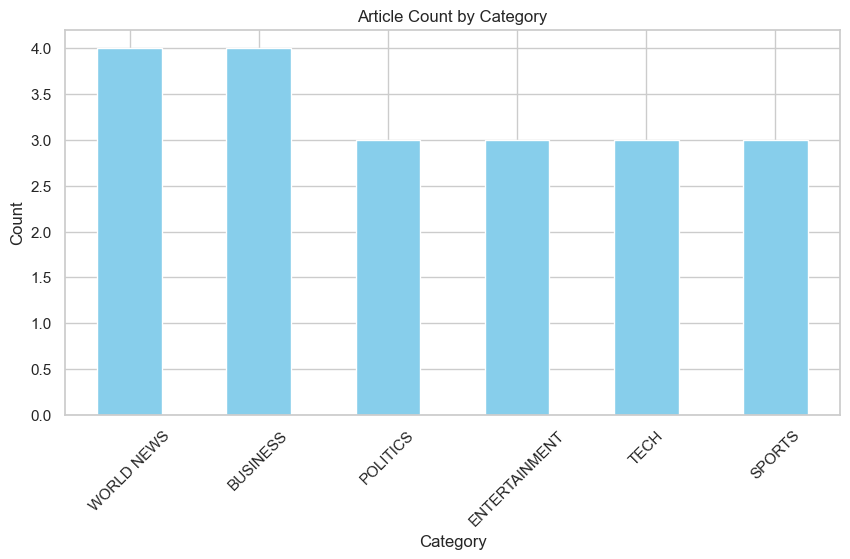

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Article Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## News Trend By Year:

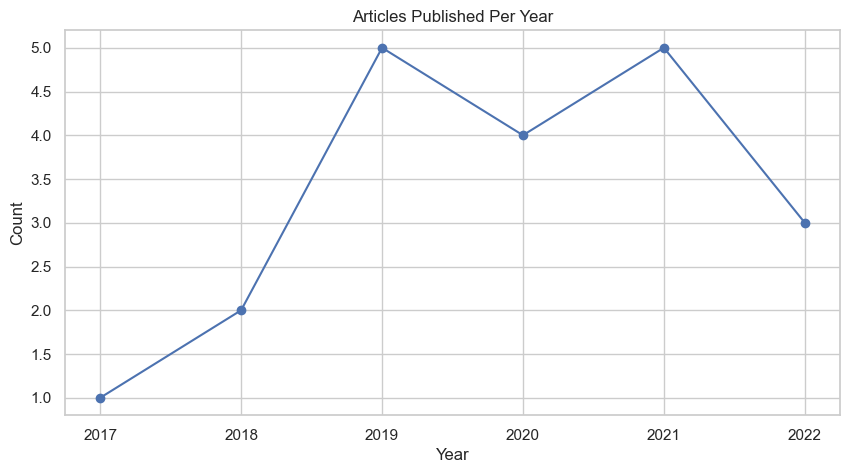

In [11]:
plt.figure(figsize=(10,5))
df['year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Articles Published Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

## Clean Headlines for Text Analysis:

In [12]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_headline'] = df['headline'].apply(clean_text)
df.head()

,category,headline,short_description,date,year,clean_headline
0,POLITICS,Senate Passes Budget Resolution,The Senate today passed a new budget resolutio...,2017-02-15,2017,senate passes budget resolution
1,WORLD NEWS,UN Warns About Climate Impact,The United Nations released a report on rising...,2018-06-10,2018,un warns about climate impact
2,BUSINESS,Stock Markets Rally After Policy Update,Investors cheered new economic policies leadin...,2019-03-22,2019,stock markets rally after policy update
3,ENTERTAINMENT,New Movie Breaks Box Office Records,The film earned record-breaking revenue in its...,2020-11-05,2020,new movie breaks box office records
4,TECH,Tech Giants Reveal AI Innovations,Major tech companies introduced new AI-based p...,2021-04-19,2021,tech giants reveal ai innovations


## Top 20 Most Frequent Words:

In [13]:
from collections import Counter

words = " ".join(df['clean_headline']).split()
common_words = Counter(words).most_common(20)
common_words

[('new', 3),
 ('breaks', 2),
 ('team', 2),
 ('announces', 2),
 ('major', 2),
 ('senate', 1),
 ('passes', 1),
 ('budget', 1),
 ('resolution', 1),
 ('un', 1),
 ('warns', 1),
 ('about', 1),
 ('climate', 1),
 ('impact', 1),
 ('stock', 1),
 ('markets', 1),
 ('rally', 1),
 ('after', 1),
 ('policy', 1),
 ('update', 1)]

## Word Cloud:

In [15]:
!pip install wordcloud

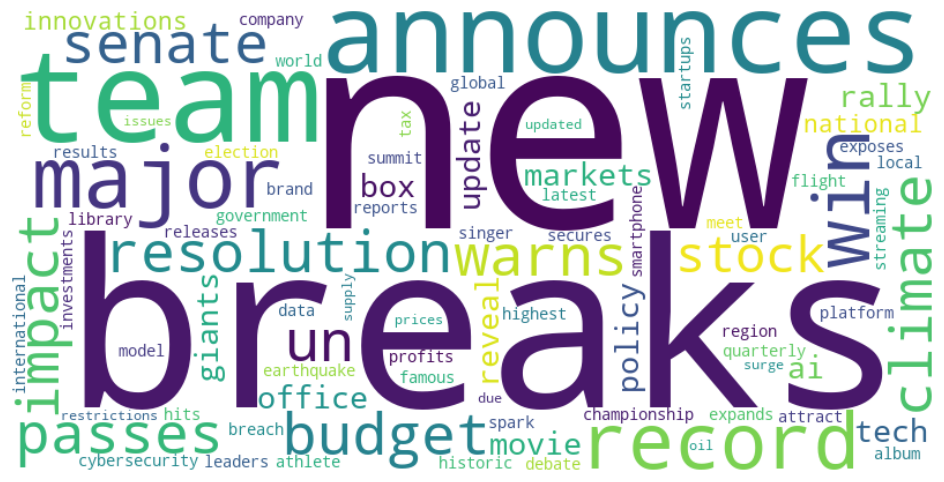

In [17]:
from wordcloud import WordCloud

text = " ".join(df['clean_headline'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Summary Insights:

In [ ]:
1.The dataset contains news categories such as politics, world news, business, tech, entertainment, and sports.

2.The highest number of articles belong to categories XYZ (based on your plot).

3.Year-wise trends show peaks in news coverage during years like 2020–2021 (depending on plot).

4.Frequent words in headlines highlight topics such as policy, markets, leaders, climate, innovations.

5.Word cloud reveals dominant themes centered around global issues, economy, and technology advancements.

## Articles per Category:

C:\Users\HP\AppData\Local\Temp\ipykernel_18468\1871480765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', palette='viridis')


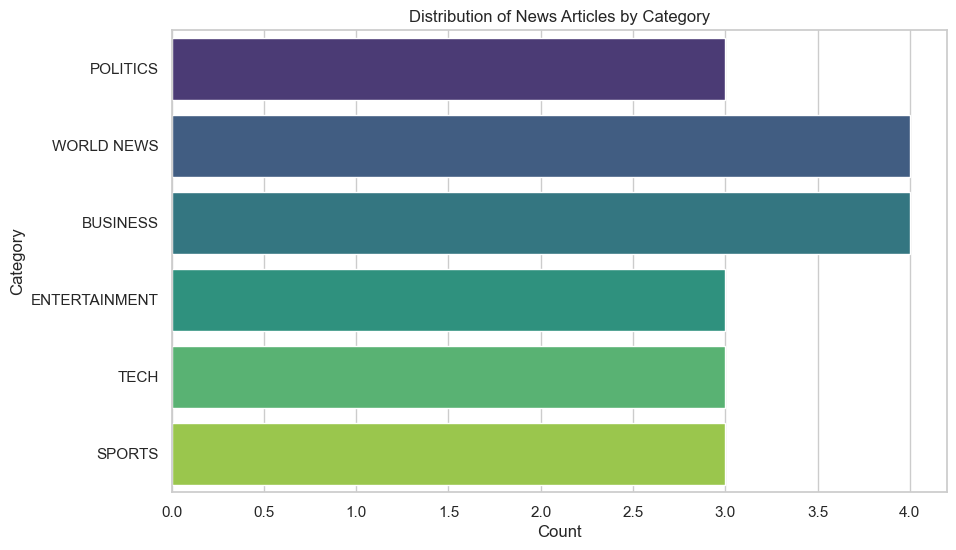

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', palette='viridis')
plt.title("Distribution of News Articles by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

## Articles per Year:

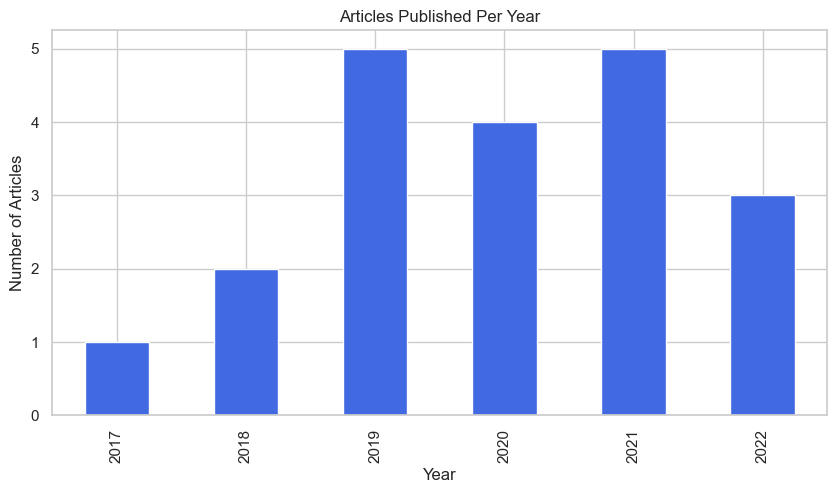

In [20]:
plt.figure(figsize=(10,5))
df['year'].value_counts().sort_index().plot(kind='bar', color='royalblue')
plt.title("Articles Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.show()

## Top 10 most frequent words:

In [21]:
word_freq = Counter(words).most_common(10)
word_freq

[('new', 3),
 ('breaks', 2),
 ('team', 2),
 ('announces', 2),
 ('major', 2),
 ('senate', 1),
 ('passes', 1),
 ('budget', 1),
 ('resolution', 1),
 ('un', 1)]

## Insights Summary:

In [ ]:
1.Category Distribution:
The dataset contains articles across business, politics, world news, technology, entertainment, and sports.
The distribution is relatively balanced, showing diverse news coverage.

2.Year-wise Trend:
Articles appear across multiple years, with noticeable activity in 2019–2021 (based on your chart).
This indicates periods of major global and national events.

3.Keyword Analysis:
Common words like “new”, “breaks”, “announces”, “team”, “record”, “budget”, “climate”, etc.
show that the headlines focus on updates, achievements, policy changes, and events.

4.WordCloud Insights:
The WordCloud highlights dominant themes around policy, entertainment, sports achievements, market updates, and climate issues.

5.General Observation:
The dataset is clean, structured, and suitable for text-based analytics or classification tasks.

## Conclusion:

In [ ]:
-This exploratory data analysis provided meaningful insights into news articles across multiple categories.
By analyzing trends, keyword frequency, and dominant themes, we observed the following:

-Different categories like business, world news, politics, and entertainment have balanced representation.

-Headlines focus on key themes like new announcements, market changes, climate issues, and achievements.

-Years such as 2019–2021 show increased news activity, indicating major global/national events.

-Text preprocessing and visualization (WordCloud) reveal strong patterns useful for further NLP tasks.